In [1]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn import utils
from sklearn import preprocessing
from sklearn.metrics import mean_squared_error
from sklearn.utils import shuffle
from rdkit import Chem
from rdkit.Chem import AllChem
import pandas as pd
import numpy as np

In [2]:
# #read the sdf file of 10 predictable molecules
# ligands_996 =Chem.SDMolSupplier('/Users/blair/Desktop/input/RF_Ustatistic/wholemol/ndonor.sdf')
# #create the ecfp fingerprint
# #x is the input, 2 is the radius
# morgan_996=[AllChem.GetMorganFingerprintAsBitVect(x,2,nBits=1024) for x in ligands_996]
# efp_996=np.array(morgan_996)
# efp_996.shape

In [3]:
# # #save the ecfp in a csv file
# pd.DataFrame(efp_996).to_csv('/Users/blair/Desktop/input/RF_Ustatistic/wholemol/ndonor.csv')

In [4]:
# #define a function for normalizing in vertical order
# def col_normalize(X):
#     X1=np.matrix(X)
#     X_1=X1.transpose()
#     X_2=np.array(X_1)
#     X_3=preprocessing.normalize(X_2,norm="l2")
#     X_4=np.matrix(X_3)
#     X_5=X_4.transpose()
#     X_6=np.array(X_5)
#     return X_6

In [5]:
#read the file containing the ecfp and isomer(1 or 2) and normalize
input=pd.read_csv('input_992.csv')#Put address
nfp_992=pd.read_csv('neuralfp.csv')
nfp_992=np.array(nfp_992)
print(len(nfp_992))
Isomer=input[['Isomer']].copy()
X_992=np.concatenate((nfp_992,Isomer),axis=1)
#X_785=col_normalize(X_785)
X_992.shape

992


(992, 1025)

In [6]:
#assign the Hammett constants to Y
Y_992=input[['Hammett Constant']].copy()
Y_992=np.array(Y_992)

In [7]:
nfp_ndonor=pd.read_csv('neuralfp_ndonor.csv')
nfp_ndonor=np.array(nfp_ndonor)
X_ndonor=nfp_ndonor
X_ndonor.shape

(10, 1025)

In [8]:
#create null list to record values later
MSE_boot=np.zeros((1000),dtype= float)
#Index= np.zeros((1000,662),dtype=int)
Y_prediction_train=np.zeros((992,1000),dtype=float)
#Y_prediction_test=np.zeros((334,1000),dtype=float)
Y_pred_all=np.zeros((992,1000),dtype=float)
Y_target_train=np.zeros((992,1000),dtype=float)
#Y_target_test=np.zeros((334,1000),dtype=float)
Y_prediction_ndonor=np.zeros((10,1000),dtype=float)
MSE_boot=np.zeros((1000),dtype= float)
print(Y_target_train[0].shape)

(1000,)


In [9]:
regr = RandomForestRegressor(n_estimators=1, max_depth=None, random_state=None,bootstrap=0)

In [10]:
for m in range(0,1000):
    #positive part
    index_992=np.random.choice(992, size=992, replace=1)
    X_train=X_992[index_992]
    Y_train=Y_992[index_992]
    X_test=np.delete(X_train,index_992,axis=0)
    Y_test=np.delete(Y_train,index_992,axis=0)
    #Y_positive_left.shape
    #negative part
#     index_negative=np.random.choice(183, size=183, replace=1)
#     X_121=X_183[index_negative]
#     Y_121=Y_negative[index_negative]
#     X_negative_left=np.delete(X_183,index_negative,axis=0)
#     Y_negative_left=np.delete(Y_negative,index_negative,axis=0)
#     #neutral part
#     index_zeros=np.random.choice(28, size=28, replace=1)
#     X_18=X_28[index_zeros]
#     Y_18=Y_zeros[index_zeros]
#     X_zeros_left=np.delete(X_28,index_zeros,axis=0)
#     Y_zeros_left=np.delete(Y_zeros,index_zeros,axis=0)
#     #target
#     X_662=np.concatenate((X_523,X_121,X_18),axis=0)
#     Y_662=np.concatenate((Y_523,Y_121,Y_18),axis=0)
#     X_662, Y_662 = shuffle(X_662, Y_662)
#     #X_662.shape
#     #print(Y_662.shape)
#     #left
#     X_left=np.concatenate((X_positive_left,X_negative_left,X_zeros_left),axis=0)
#     Y_left=np.concatenate((Y_positive_left,Y_negative_left,Y_zeros_left),axis=0)
#     Y_target_train[:,m]=Y_662.ravel()
#     #Y_target_test[:,m]=Y_left.ravel()
#     #Y_left.shape
#     #RF
    X_resample= X_train
    Y_resample= Y_train
    regr.fit(X_resample, Y_resample.ravel())
    Y_pred_train=regr.predict(X_resample)    #Fit RF on training set
    Y_pred_test=regr.predict(X_test)        #Fit RF on testing set
    Y_pred_all_each=regr.predict(X_992)     # Fit RF on complete database
    Y_pred_all[:,m]=Y_pred_all_each
    #Y_prediction_test[:,m]=Y_pred_left
    Y_prediction_train[:,m]=Y_pred_train
    #Y_pred_all=regr.predict(X_996)
    Y_pred_ndonor=regr.predict(X_ndonor)    # Fit RF on ndonor
    Y_prediction_ndonor[:,m]=Y_pred_ndonor
    MSE_train=mean_squared_error(Y_resample, Y_pred_train)
    MSE_test=mean_squared_error(Y_test, Y_pred_test)
    MSE_boot[m]=(MSE_train*0.368)+(0.632)*(MSE_test)

In [11]:
Y_prediction_mean=Y_pred_all.mean(axis=1)
Y_prediction_mean

array([ 2.80080000e-01,  4.25400000e-02,  6.57200000e-02, -3.26375000e-01,
       -3.62290000e-01,  4.01736667e-01,  4.62860000e-01,  2.97200000e-01,
        1.67210000e-01,  5.39010000e-01,  5.72020000e-01,  7.16120000e-01,
        7.65900000e-01,  3.14180000e-01,  3.30240000e-01,  3.17510000e-01,
        3.23260000e-01,  4.56780000e-01,  5.12100000e-01,  1.94850000e-01,
        1.12210000e-01,  4.11640000e-01,  4.45750000e-01,  3.89860000e-01,
        4.89250000e-01,  4.12950000e-01,  4.78990000e-01,  4.98642667e-01,
        5.18370000e-01,  3.11340000e-01,  3.27450000e-01,  4.67520000e-01,
        5.25330000e-01,  3.70200000e-02, -3.02700000e-02,  1.52058000e-01,
        1.53526667e-01, -9.87000000e-02, -1.33350000e-01, -7.25300000e-02,
       -1.32400000e-01, -4.90600000e-02,  1.64020000e-01, -1.35990000e-01,
        1.43410000e-01,  1.42152381e-01,  1.89390000e-01,  1.71440000e-01,
        5.64275000e-02, -6.19800000e-02,  1.47865333e-01,  1.39315000e-01,
        1.31746667e-01,  

In [12]:
Y_prediction_mean[170]

-0.4522400000000001

In [13]:
Y_prediction_std=Y_pred_all.std(axis=1)
Y_prediction_std

array([0.05088019, 0.10633225, 0.10732233, 0.28935045, 0.25156163,
       0.14532055, 0.14955474, 0.24662392, 0.30068741, 0.06445401,
       0.07058696, 0.16015226, 0.16875186, 0.09858056, 0.1246561 ,
       0.11672061, 0.13762621, 0.11003741, 0.11463939, 0.13174209,
       0.14949453, 0.08500418, 0.10129777, 0.08445342, 0.10361437,
       0.08291078, 0.09005043, 0.09502837, 0.1031998 , 0.0878829 ,
       0.10800184, 0.09145846, 0.10111425, 0.11653205, 0.13238213,
       0.1467864 , 0.15637626, 0.07452993, 0.06515272, 0.07278667,
       0.08491313, 0.08376584, 0.14377009, 0.10174193, 0.11953923,
       0.12857692, 0.06675274, 0.07607974, 0.1291268 , 0.16812103,
       0.13048605, 0.13391942, 0.12969997, 0.13966636, 0.17124595,
       0.20270475, 0.20558641, 0.25126945, 0.11793302, 0.1559198 ,
       0.12970887, 0.14245193, 0.13653556, 0.15446441, 0.0714643 ,
       0.06854956, 0.11724393, 0.1319438 , 0.18527001, 0.24692893,
       0.25796128, 0.08950503, 0.0978886 , 0.09650637, 0.10597

In [14]:
sigma1=Y_prediction_std*2.03/(1000**0.5)
#sigma1.min()

In [15]:
MSE_all=mean_squared_error(Y_prediction_mean,Y_992)
MSE_all

0.003762762103714919

In [16]:
#n_donor with NH2
Y_ndonor_mean=Y_prediction_ndonor.mean(axis=1)
print("        NOC,        NC,            N,           NCF3,       NNO2")
Y_ndonor_mean

        NOC,        NC,            N,           NCF3,       NNO2


array([ 0.0147    , -0.23483   ,  0.45061   ,  0.3548    ,  0.2428    ,
        0.24006333,  0.28806167,  0.46267   ,  0.6271    ,  0.53242   ])

In [17]:
# print("  NOC,        NC,         N,           NCF3,       NNO2,     imidazole_OC")
# print(Y_ndonor_mean)

In [18]:
Y_ndonor_std=Y_prediction_ndonor.std(axis=1)
Y_ndonor_std

array([0.26314276, 0.26641091, 0.45166683, 0.3613358 , 0.47315786,
       0.35118135, 0.21494498, 0.3534252 , 0.18060285, 0.17375944])

In [24]:
ndonor=np.zeros((2,10),dtype=float)
ndonor[0]=Y_ndonor_mean
ndonor[1]=Y_ndonor_std
# ndonor=np.concatenate((Y_ndonor_mean,Y_ndonor_std),axis=1)
pd.DataFrame(ndonor.T).to_csv('ndonor_ms.csv')#Put address
ndonor.T

array([[ 0.0147    ,  0.26314276],
       [-0.23483   ,  0.26641091],
       [ 0.45061   ,  0.45166683],
       [ 0.3548    ,  0.3613358 ],
       [ 0.2428    ,  0.47315786],
       [ 0.24006333,  0.35118135],
       [ 0.28806167,  0.21494498],
       [ 0.46267   ,  0.3534252 ],
       [ 0.6271    ,  0.18060285],
       [ 0.53242   ,  0.17375944]])

In [19]:
# sigma2=Y_ndonor_std*2.03/(1000**0.5)
# sigma2

In [23]:
pd.DataFrame(Y_prediction_mean).to_csv('Y_prediction_mean.csv')#Put address

In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib

font = {'family' : 'normal',
        'weight' : 'normal',
        'size'   : 35}

matplotlib.rc('font', **font)
# filename = 'Y_all.csv'
# df = pd.read_csv(filename)
# #df1= pd.read_csv('FEC_10000.csv')
# df.columns#, df1.columns

#Plot parameters

xlow = -1.5
xhigh = 2.5


x=input['Hammett Constant']
y=Y_prediction_mean
y_err=[Y_prediction_std,Y_prediction_std]

/Users/blair/anaconda3/lib/python3.6/site-packages/matplotlib/text.py:2178: UserWarning: You have used the `textcoords` kwarg, but not the `xytext` kwarg.  This can lead to surprising results.
  warnings.warn("You have used the `textcoords` kwarg, but not "


Text(-1.4, 1.9, 'Test set: 992 data points')

/Users/blair/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1241: UserWarning: findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.
  (prop.get_family(), self.defaultFamily[fontext]))


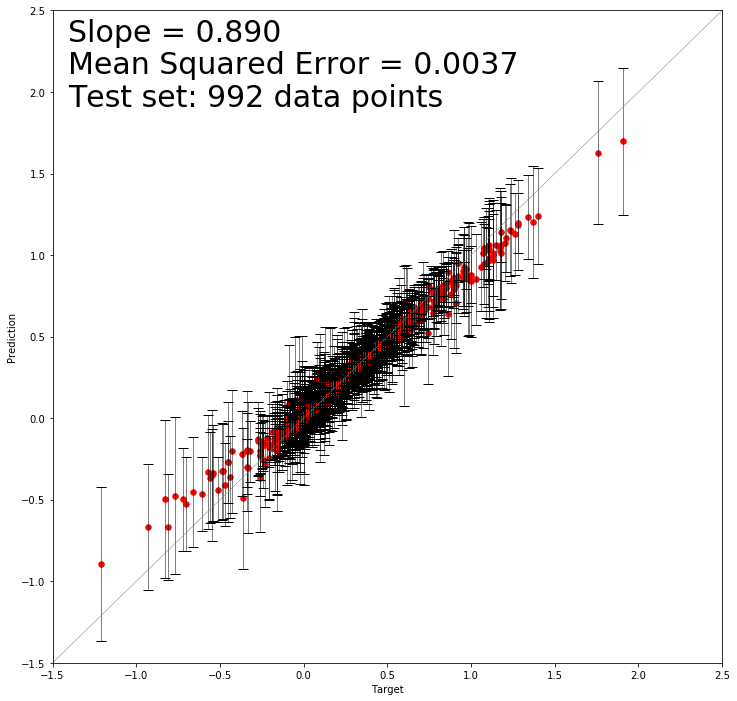

In [22]:
def scatplot(x_data, y_data, error_data, x_label, y_label, title):
    _, ax = plt.subplots(figsize=(12,12))
    # Draw bars, position them in the center of the tick mark on the x-axis
    ax.scatter(x_data, y_data, color = 'red',s=30)
    # Draw error bars to show standard deviation, set ls to 'none'
    # to remove line between points
    ax.errorbar(x_data, y_data,  
                yerr = error_data, 
                color = 'black', 
                ls = 'none', 
                lw = 0.5, capsize = 5)
    plt.xlim(xlow,xhigh)
    plt.ylim(xlow,xhigh)
    ax.plot([xlow, xhigh], [xlow, xhigh], color='gray', linestyle='-', linewidth=0.5)
    ax.set_ylabel(y_label)
    ax.set_xlabel(x_label)
    ax.set_title(title,fontsize=22.5)
    

# Call the function to create plot
scatplot(x_data = x, 
         y_data = y,
         error_data = y_err,
         x_label = 'Target',
         y_label = 'Prediction',
         title = '')

plt.annotate('Slope = 0.890', 
             xy=(-1.4, 2.3),  
             xycoords='data',
             textcoords='offset points',
             fontsize='30'
            # arrowprops=dict(arrowstyle="->")
            )
plt.annotate('Mean Squared Error = 0.0037', 
             xy=(-1.4, 2.1),  
             xycoords='data',
             textcoords='offset points',
             fontsize='30'
            # arrowprops=dict(arrowstyle="->")
            )
plt.annotate('Test set: 992 data points', 
             xy=(-1.4, 1.9),  
             xycoords='data',
             textcoords='offset points',
             fontsize='30'
            # arrowprops=dict(arrowstyle="->")
            )
        
#Plotting prediction for inputs without 
#plt.scatter(x1, y1, color = 'green',s=30)
#plt.errorbar(x1, y1,yerr = y1_err, color = 'k', ls = 'none', lw = 0.5, capsize = 5)
#plt.show()